In [1]:
# %load_ext autoreload
# %autoreload 2

# Experiments with TEASER-S model

In [2]:
from pathlib import Path
import numpy as np

import teaser.util as util
import teaser.evaluation as evaluation

from teaser.algorithm.teaser_s import TEASER_S

## Datasets

In [3]:
## Uncomment corresponding directory.
# DATA_DIR = Path('../../data/Publiq/')
DATA_DIR = Path('../../data/ML20M/')

In [4]:
# Shouldn't need to change this info
INTERACTIONS_TRAIN_PATH = DATA_DIR / 'interactions.train.csv'
INTERACTIONS_VALIN_PATH = DATA_DIR / 'interactions.valin.csv'
INTERACTIONS_VALOUT_PATH = DATA_DIR / 'interactions.valout.csv'
INTERACTIONS_TESTIN_PATH = DATA_DIR / 'interactions.testin.csv'
INTERACTIONS_TESTOUT_PATH = DATA_DIR / 'interactions.testout.csv'

METADATA_PATH = DATA_DIR / 'features.csv'

ITEM_ID = 'itemId'
USER_ID = 'userId'

## Define algorithm and hyperparameter ranges

In [5]:
ALG = TEASER_S

L2_1 = [10 ** p for p in range(2, 4)]
L2_2 = [10 ** p for p in range(7, 13)]
# L2_1 = 100
# L2_2 = 100000000
# RHO = [10 ** p for p in range(1, 5)]  # no rho scaling 
RHO = 0
# RHO = [500, 100000]
DELTA = 0
MAX_ITER = 1
HYPERPARAMS = {'l2_1': L2_1, 'l2_2': L2_2, 'rho': RHO, 'delta': DELTA,'max_iterations': MAX_ITER}
HYPERPARAMS

{'l2_1': [100, 1000],
 'l2_2': [10000000,
  100000000,
  1000000000,
  10000000000,
  100000000000,
  1000000000000],
 'rho': 0,
 'delta': 0,
 'max_iterations': 1}

## Parse data

In [6]:
S, tags = util.parse_metadata(METADATA_PATH, item_id=ITEM_ID)
n, t = S.shape  # amount of items and tags

X = util.parse_interactions(INTERACTIONS_TRAIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

Xval_in = util.parse_interactions(INTERACTIONS_VALIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xval_out = util.parse_interactions(INTERACTIONS_VALOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_in = util.parse_interactions(INTERACTIONS_TESTIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_out = util.parse_interactions(INTERACTIONS_TESTOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

In [7]:
# # debug
# d_items = 1000
# S = S[:d_items,:]
# tags = tags[:d_items]
# X = X[:,:d_items]
# Xval_in = Xval_in[:,:d_items]
# Xval_out = Xval_out[:,:d_items]
# Xtest_in = Xtest_in[:,:d_items]
# Xtest_out = Xtest_out[:,:d_items]

## Perform gridsearch on validation set

In [8]:
# Precomput XTX and decomposition of XTX, since it's needed for all hyperparameters combinations and doesn't change
XTX = (X.T @ X).toarray()
p, U = np.linalg.eigh(XTX)
fit_params = {'XTX': XTX, 'p': p, 'U': U}

In [9]:
score, best_hyperparams = evaluation.gridsearch(ALG, X, S, Xval_in, Xval_out, HYPERPARAMS, fit_params=fit_params)

Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 10000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


/home/jdepauw/TEASER/teaser/algorithm/teaser_s.py:132: RuntimeWarning: divide by zero encountered in true_divide
  beta /= (XTX_diag + self.l2_1 + 2 * self.rho)


norm E 3.946128358748557
diag norm: 1.5849007625798583
diag_diff: inf


Evaluating with 10000 users
Average Recall@20 0.02428
Average Recall@100 0.05068
Average nDCG@100 0.03099
Training model TEASER_S with hyperparameters {'l2_1': 1000, 'l2_2': 10000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 6.537735996409101
diag norm: 3.009830407399754
diag_diff: 29.219702086298252


Evaluating with 10000 users
Average Recall@20 0.02552
Average Recall@100 0.05301
Average nDCG@100 0.03324
Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 100000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.16814528721664757
diag norm: 0.1139907524254988
diag_diff: inf


Evaluating with 10000 users
Average Recall@20 0.11074
Average Recall@100 0.23739
Average nDCG@100 0.13573
Training model TEASER_S with hyperparameters {'l2_1': 1000, 'l2_2': 100000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.13327229277461813
diag norm: 0.0668438571057222
diag_diff: 5.401662185373005


Evaluating with 10000 users
Average Recall@20 0.01387
Average Recall@100 0.03959
Average nDCG@100 0.02004
Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 1000000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.024153990302596396
diag norm: 0.02885803813836896
diag_diff: inf


Evaluating with 10000 users
Average Recall@20 0.00047
Average Recall@100 0.00158
Average nDCG@100 0.00062
Training model TEASER_S with hyperparameters {'l2_1': 1000, 'l2_2': 1000000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.058836542454714924
diag norm: 0.0705471276281104
diag_diff: 6.001359027308955


Evaluating with 10000 users
Average Recall@20 0.00024
Average Recall@100 0.00062
Average nDCG@100 0.0002
Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 10000000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.000779483580390035
diag norm: 0.0009340107822448109
diag_diff: inf


Evaluating with 10000 users
Average Recall@20 0.05605
Average Recall@100 0.11223
Average nDCG@100 0.07629
Training model TEASER_S with hyperparameters {'l2_1': 1000, 'l2_2': 10000000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0007785954333312398
diag norm: 0.0009328521689369048
diag_diff: 4.669772693255027


Evaluating with 10000 users
Average Recall@20 0.05603
Average Recall@100 0.11222
Average nDCG@100 0.07628
Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 100000000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 8.719649759061002e-05
diag norm: 0.00010531678984125407
diag_diff: inf


Evaluating with 10000 users
Average Recall@20 0.05817
Average Recall@100 0.11716
Average nDCG@100 0.07876
Training model TEASER_S with hyperparameters {'l2_1': 1000, 'l2_2': 100000000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 8.718474666445362e-05
diag norm: 0.00010530182597747142
diag_diff: 4.622715999221901


Evaluating with 10000 users
Average Recall@20 0.05817
Average Recall@100 0.11716
Average nDCG@100 0.07877
Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 1000000000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 8.828960501128683e-06
diag norm: 1.06704874831016e-05
diag_diff: inf


Evaluating with 10000 users
Average Recall@20 0.05842
Average Recall@100 0.11739
Average nDCG@100 0.07893
Training model TEASER_S with hyperparameters {'l2_1': 1000, 'l2_2': 1000000000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 8.828839336151079e-06
diag norm: 1.0670333564846925e-05
diag_diff: 4.617408563540501


Evaluating with 10000 users
Average Recall@20 0.05842
Average Recall@100 0.11739
Average nDCG@100 0.07893



In [10]:
f"Best score of {score} achieved with {best_hyperparams}."

"Best score of 0.13573249339837348 achieved with {'l2_1': 100, 'l2_2': 100000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}."

## Evaluate model with optimal hyperparams on test set

In [11]:
%%time
alg = ALG(**best_hyperparams)
alg.fit(X, S, **fit_params)

Decompose DTD


norm E 0.16814528721664757
diag norm: 0.1139907524254988
diag_diff: inf


CPU times: user 18min 51s, sys: 2min 41s, total: 21min 32s
Wall time: 49.6 s


In [12]:
print("Performance on test set")
score = evaluation.eval(alg, Xtest_in, Xtest_out)

Performance on test set
Evaluating with 10000 users
Average Recall@20 0.11037
Average Recall@100 0.23313
Average nDCG@100 0.13621


## Plot amount of items from long tail recommended

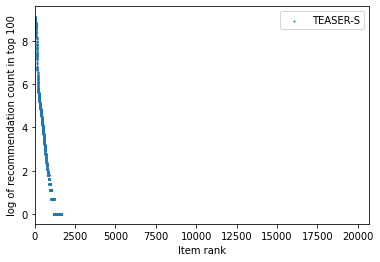

In [13]:
# evaluation.plot_long_tail(alg, Xtest_in=Xtest_in, Xtest_out=Xtest_out, labels=["EASE", "Test items"], k=100)
evaluation.plot_long_tail(alg, histories=Xtest_in, labels=["TEASER-S"], k=100)